# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Erika Dwi Puspitasari
- **Email:** m180d4kx2248@bangkit.academy
- **ID Dicoding:** erikapuspita

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Apa kota dengan jumlah pelanggan terbanyak?
- Pertanyaan 2 : Bagaimana perbandingan jumlah pengiriman yang terlambat dengan yang tepat waktu berdasarkan waktu estimasi pengiriman?
- Pertanyaan 3 : Apakah terdapat korelasi antara berat produk dengan biaya pengiriman? Apakah berat produk mempengaruhi biaya pegiriman?
- Pertanyaan 4 : Bagaimana trend jumlah pembelian per bulan dari waktu ke waktu?

## Import Semua Packages/Library yang Digunakan

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

# Gathering Data

*   **Load Tabel Customers**

Data pertama yang harus kita muat ialah data dari tabel customers. Berikut merupakan kode untuk memuat tabel tersebut menjadi sebuah DataFrame.

In [160]:
customers_df = pd.read_csv("customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


*  **Load Tabel Order**

Data selanjutnya yang harus kita muat ialah data dari tabel orders. Hal ini dapat dilakukan dengan menjalankan kode berikut.

In [161]:
orders_df = pd.read_csv("orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


*   **Load Tabel Product**

Tabel berikutnya yang harus kita muat ialah tabel product. Berikut merupakan kode yang dapat digunakan untuk membuat tabel product menjadi sebuah DataFrame bernama product_df.

In [162]:
product_df = pd.read_csv("products_dataset.csv")
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


*   **Load Tabel Order Item**

Tabel berikutnya yang harus kita muat ialah tabel order item. Berikut merupakan kode yang dapat digunakan untuk membuat tabel product menjadi sebuah DataFrame bernama order_item_df.



In [163]:
order_item_df = pd.read_csv("order_items_dataset.csv")
order_item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


*   **Load Tabel Order Paymet**

Tabel berikutnya yang harus kita muat ialah tabel order payment. Berikut merupakan kode yang dapat digunakan untuk membuat tabel product menjadi sebuah DataFrame bernama order_payment_df.


In [164]:
order_payment_df = pd.read_csv("order_payments_dataset.csv")
order_item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


# Assessing Data

Sekarang kita masuk ke tahap kedua dalam proses data wrangling yaitu assessing data. Pada proses ini kita akan menilai kualitas dari seluruh data yang akan digunakan. Penilaian ini bertujuan untuk melihat berbagai permasalahan yang ada dalam data tersebut.

## **1. Menilai Data customers_df**
Data pertama yang akan kita nilai adalah customers_df. Sebagai permulaan, kita memeriksa tipe data data dari tiap kolom yang terdapat dalam customers_df. Proses ini dapat dilakukan menggunakan method info() seperti contoh kode berikut.

In [165]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Hasil menunjukkan bahwa tidak terdapat masalah pada tipe data tiap kolom

### **- Mengecek Missing Value Data Customers**

In [166]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Terlihat bahwa tidak terdapat missing value pada data customers

### **- Mengecek Duplikasi Data Customers**

In [167]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


Terlihat bahwa tidak terdapat duplikasi pada data customers

### **- Memeriksa Parameter Statistik Data Customers**

In [168]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


## **2. Menilai Data Orders**
Selanjutnya kita akan menilai data pada orders_df. Seperti biasa, kita akan mulai dengan memeriksa tipe data dari tiap kolom menggunakan method info().

In [169]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Dari hasil terdapat kesalahan karena format tanggal yang digunakan  dalam kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date bukan format yang sesuai. Untuk menangani hal ini, kita nanti perlu mengonversi kolom tanggal ke dalam format yang sesuai yakni datetime

### **- Mengecek Missing Value Data Orders**

In [170]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Hasil menunjukkan bahwa terdapat missing values pada kolom order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date. Hal ini akan kita tangani pada tahap data cleaning nanti.

### **- Mengecek Duplikasi Data Orders**

In [171]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


Terlihat bahwa tidak terdapat duplikasi pada data orders

### **- Memeriksa Parameter Statistik Data Orders**

In [172]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


## **3. Menilai Data Product**
Selanjutnya, kita akan menilai data pada product_df. Pertama, gunakan method info() untuk memastikan tipe data tiap kolom dalam product_df telah sesuai.



In [173]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Hasil menunjukkan bahwa tidak terdapat masalah pada tipe data tiap kolom

### **- Mengecek Missing Value**

In [174]:
product_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Hasil menunjukkan bahwa terdapat missing values pada kolom product_category_name, product_name_lenght product_description_lenght, product_photos_qty. Hal ini akan kita tangani pada tahap data cleaning nanti.

### **- Mengecek Duplikasi Data**

In [175]:
print("Jumlah duplikasi: ", product_df.duplicated().sum())

Jumlah duplikasi:  0


Terlihat bahwa tidak terdapat duplikasi pada data product

### **- Memeriksa Parameter Statistik Data Product**

In [176]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


## **4. Menilai Data Order Item**

In [177]:
order_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Hasil menunjukkan bahwa tidak terdapat masalah pada tipe data tiap kolom

### **- Mengecek Missing Value Order Item**

In [178]:
order_item_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Hasil menunjukkan bahwa tidak terdapat missing value pada data

### **- Mengecek Duplikasi Data Order Item**

In [179]:
print("Jumlah duplikasi: ", order_item_df.duplicated().sum())

Jumlah duplikasi:  0


Hasil menunjukkan bahwa tidak terdapat duplikasi pada data

### **- Memeriksa Parameter Statistik Data Order Items**

In [209]:
order_item_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


## **2. Menilai Data Orders Payment**

Selanjutnya kita akan menilai data pada orders_payment_df. Seperti biasa, kita akan mulai dengan memeriksa tipe data dari tiap kolom menggunakan method info().

In [180]:
order_payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Hasil menunjukkan bahwa tidak terdapat masalah pada tipe data tiap kolom

### **- Mengecek Missing Value Data Order Payment**

In [181]:
order_payment_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Hasil menunjukkan bahwa tidak terdapat missing value

### **- Mengecek Duplikasi Data Order Payment**

In [182]:
print("Jumlah duplikasi: ", order_payment_df.duplicated().sum())

Jumlah duplikasi:  0


Hasil menunjukkan bahwa tidak terdapat duplikasi pada data

### **- Memeriksa Parameter Statistik Data Order Items**

In [210]:
order_payment_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


# Cleaning Data

Pada tahap ini, kita akan membersihkan berbagai masalah yang telah teridentifikasi dalam proses assessing data.

## **1. Membersihkan Data Orders**
Berdasarkan hasil proses assessing data, diketahui bahwa terdapat masalah yang dijumpai dalam orders_df, yaitu  missing value. Pada tahap ini, kita akan membersihkan masalah tersebut.

### **- Menangani missing value**

Secara umum terdapat tiga metode untuk mengatasi missing value yaitu dropping, imputation, dan interpolation. Untuk menentukan metode mana yang akan digunakan, kita perlu melihat data yang mengandung missing value tersebut menggunakan teknik filtering seperti berikut.

In [183]:
orders_df[orders_df['order_approved_at'].isna() | orders_df['order_delivered_carrier_date'].isna() | orders_df['order_delivered_customer_date'].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


Kode di atas hanya akan menampilkan baris data yang memenuhi kondisi atau dengan kata lain ia akan menampilkan baris data yang mengandung missing value pada kolom order_delivered_carrier_date, atau order_delivered_customer_date.

Berdasarkan gambar di atas, dapat dilihat bahwa baris data tersebut masih mengandung banyak informasi penting sehingga sayang jika langsung dibuang. Oleh karena itu, pada kasus ini, kita akan menggunakan metode imputation untuk menangani missing value.

Pada metode imputation, kita akan menggunakan nilai rata-rata dari kolom-kolom tersebut. Namun, kita perlu mengonversi format kolom menjadi datetime

In [184]:
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'], errors='coerce')
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'], errors='coerce')
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'], errors='coerce')

Setelah itu kita dapat melakukan penanganan imputation

In [185]:
# Menghitung nilai rata-rata (mean)
mean_order_approved_at = orders_df['order_approved_at'].mean()
mean_order_delivered_carrier_date = orders_df['order_delivered_carrier_date'].mean()
mean_order_delivered_customer_date = orders_df['order_delivered_customer_date'].mean()

# Mengganti missing value dengan nilai rata-rata yang telah dihitung
orders_df['order_approved_at'].fillna(mean_order_approved_at, inplace=True)
orders_df['order_delivered_carrier_date'].fillna(mean_order_delivered_carrier_date, inplace=True)
orders_df['order_delivered_customer_date'].fillna(mean_order_delivered_customer_date, inplace=True)

Mengecek kembali apakah ada missing value atau tidak

In [186]:
print(orders_df.isnull().sum())

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


Terlihat bahwa sudah tidak terdapat missing value pada data orders

## **2. Membersihkan Data Product**

Berdasarkan hasil proses assessing data, diketahui bahwa terdapat masalah yang dijumpai dalam product_df, yaitu missing value. Pada tahap ini, kita akan membersihkan masalah tersebut.

### **- Menangani missing value**

Kita akan menggunakan metode implikasi dengan mengganti missing value dengan nilai rata-rata pada kolom-kolom tersebut

In [187]:
product_df['product_category_name'].fillna(product_df['product_category_name'].mode()[0], inplace=True)
product_df['product_name_lenght'].fillna(product_df['product_name_lenght'].mean(), inplace=True)
product_df['product_description_lenght'].fillna(product_df['product_description_lenght'].mean(), inplace=True)
product_df['product_photos_qty'].fillna(product_df['product_photos_qty'].mean(), inplace=True)
product_df['product_weight_g'].fillna(product_df['product_weight_g'].mean(), inplace=True)
product_df['product_length_cm'].fillna(product_df['product_length_cm'].mean(), inplace=True)
product_df['product_height_cm'].fillna(product_df['product_height_cm'].mean(), inplace=True)
product_df['product_width_cm'].fillna(product_df['product_width_cm'].mean(), inplace=True)

Cek kembali apakah masih ada missing value

In [188]:
print(product_df.isnull().sum())

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


Terlihat bahwa sudah tidak terdapat missing value pada data product

## Exploratory Data Analysis (EDA)

### Explore ...

Untuk menjawab pertanyaan bisnis nomor 1 dan 2, kita perlu menggabungkan tabel data orders dan customer terlebih dahulu

In [189]:
merged_df = pd.merge(customers_df, orders_df, on='customer_id', how='inner')

In [190]:
print(merged_df)

                            customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

       customer_zip_code_prefix          customer_city customer_state  \
0 

**Untuk pertanyaan 1 : Menghitung jumlah pelanggan yang terbanyak di setiap kota**

In [191]:
city_counts = customers_df['customer_city'].value_counts()

# Mengambil 10 kota dengan jumlah pelanggan terbanyak
top_cities = city_counts.head(10)

**Untuk pertanyaan no 2 : Menghitung jumlah pengiriman yang terlambat dan jumlah pengiriman yang tepat waktu dalam kumpulan data pesanan (orders_df).**

In [192]:
orders_df['is_late_delivery'] = orders_df['order_delivered_customer_date'] > orders_df['order_estimated_delivery_date']
late_deliveries_count = orders_df['is_late_delivery'].sum()
on_time_deliveries_count = len(orders_df) - late_deliveries_count

**Untuk pertanyaan no 3 : Agar mengetahui korelasi antara berat produk dengan biaya pengiriman, kita perlu menggabungkan tabel product dan order payment**

In [193]:
merged_df2 = pd.merge(order_item_df, product_df[['product_id', 'product_weight_g']], on='product_id', how='left')
merged_df2 = pd.merge(merged_df2, order_payment_df[['order_id', 'payment_value']], on='order_id', how='left')
final_merged_df = pd.merge(merged_df, merged_df2, on='order_id', how='inner')

In [194]:
print(final_merged_df)

                             customer_id                customer_unique_id  \
0       06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1       18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2       4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3       b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4       4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                  ...                               ...   
117599  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
117600  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
117601  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
117602  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
117603  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

        customer_zip_code_prefix          customer_city custome

Untuk pertanyaan 4 : Menghitung tren jumlah pembelian per bulan dari waktu ke waktu

In [195]:
# Konversi kolom order_purchase_timestamp ke format datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

# Ekstrak bulan dan tahun dari order_purchase_timestamp
orders_df['order_purchase_month'] = orders_df['order_purchase_timestamp'].dt.to_period('M')

# Menghitung jumlah pembelian per bulan
tren_monthly_orders = orders_df.groupby('order_purchase_month').size()


## Visualization & Explanatory Analysis

### Pertanyaan 1:

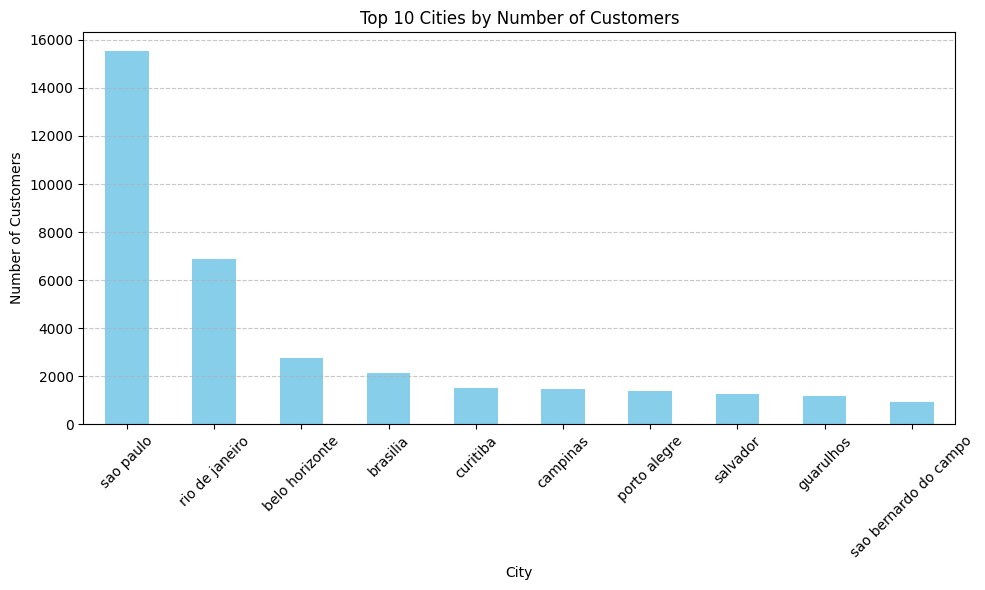

In [196]:
# Membuat plot
plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar', color='skyblue')
plt.title('Top 10 Cities by Number of Customers')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Pertanyaan 2:

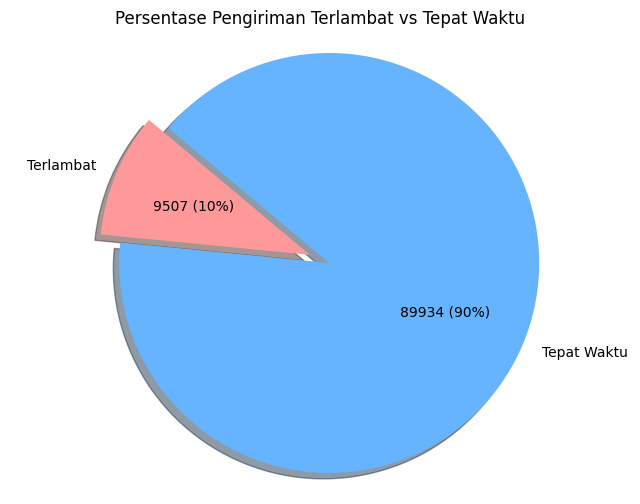

In [197]:
sizes = [late_deliveries_count, on_time_deliveries_count]
labels = ['Terlambat', 'Tepat Waktu']
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)


plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct=lambda p: '{:.0f} ({:.0f}%)'.format(p * sum(sizes) / 100, p),
        shadow=True, startangle=140)
plt.title('Persentase Pengiriman Terlambat vs Tepat Waktu')
plt.axis('equal')
plt.show()

### Pertanyaan 3:

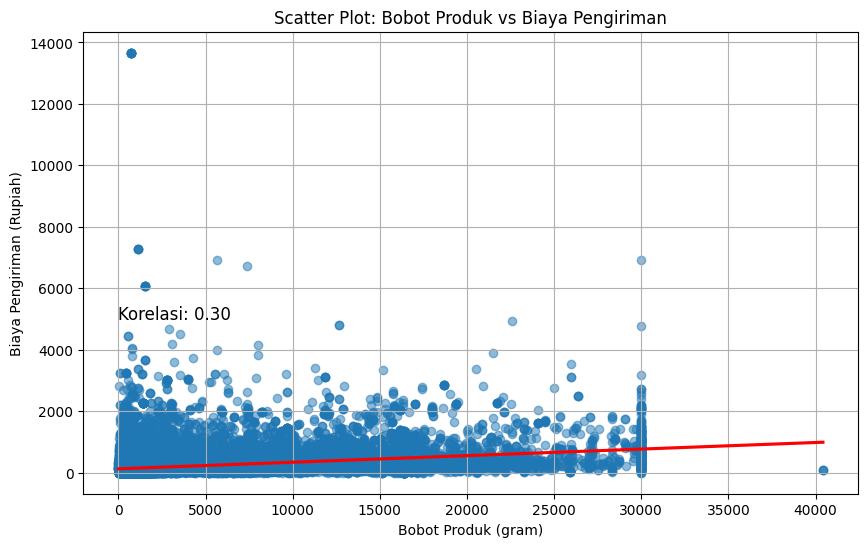

In [207]:
# Menampilkan scatter plot dan garis korelasi
plt.figure(figsize=(10, 6))
sns.regplot(x='product_weight_g', y='payment_value', data=final_merged_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Scatter Plot: Bobot Produk vs Biaya Pengiriman')
plt.xlabel('Bobot Produk (gram)')
plt.ylabel('Biaya Pengiriman (Rupiah)')
plt.grid(True)

# Menghitung koefisien korelasi Pearson
correlation_coefficient = final_merged_df['product_weight_g'].corr(final_merged_df['payment_value'])
plt.text(0.2, 5000, f"Korelasi: {correlation_coefficient:.2f}", fontsize=12)

plt.show()

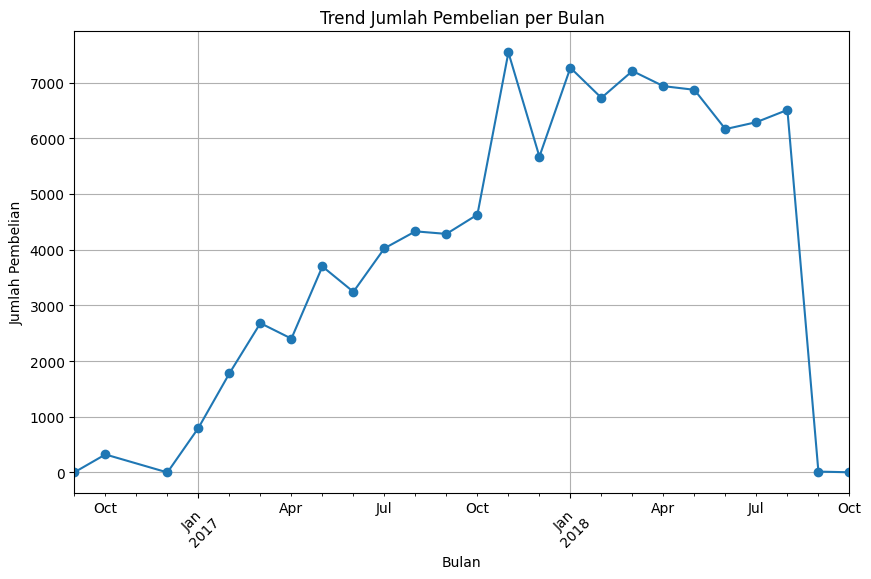

In [198]:
# Visualisasi trend jumlah pembelian per bulan
plt.figure(figsize=(10, 6))
tren_monthly_orders.plot(marker='o')
plt.title('Trend Jumlah Pembelian per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pembelian')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Conclusion

### **- Conclution pertanyaan 1**
Dari hasil visualisasi di atas, dapat ditarik kesimpulan bahwa kota dengan jumlah pelanggan terbanyak adalah kota Sao Paulo, kemudian disusul dengan kota Rio de Janairo, dan Belo Horizonte. Mengetahui kota dengan jumlah pelanggan terbanyak dapat membantu untuk mengidentifikasi wilayah yang potensial sebagai strategi pemasaran lebih lanjut atau juga dapat membantu dalam penyediaan seperti stok produk dan layanan pelanggan yang lebih intensif di wilayah tersebut.
### **- Conclution pertanyaan 2**
Dari hasil visualisasi di atas, dapat ditarik kesimpulan bahwa jumlah pengiriman yang tepat waktu sesuai estimasi jauh lebih banyak (89934) dibandingkan jumlah pengiriman yang terlambat (9507), yakni dengan perbandingan = 9:1 (90%:10%). Mengetahui perbandingan pengiriman yang terlambat dan tepat waktu seperti ini lebih lanjutnya dapat membantu mencari cara untuk meningkatkan efisiensi logistik di area pengiriman yang terlambat sehingga dapat meningkatkan kepuasan pelanggan.
### **- Conclution pertanyaan 3**
Dari hasil visualisasi di atas, dapat ditarik kesimpulan bahwa terdapat korelasi positif antara berat produk dengan biaya pengiriman, yang artinya semakin berat produk maka biaya pengiriman juga akan cenderung meningkat / semakin mahal.
### **- Conclution pertanyaan 4**
Dari hasil visualisasi di atas, dapat ditarik kesimpulan bahwa jumlah pembelian pelanggan yang paling tinggi terjadi pada bulan November 2017. Adapula penurunan jumlah pembelian yang drastis terjadi pada bulan September 2018. Mengetahui tren pembelian pelanggan per bulan seperti ini lebih lanjutnya dapat membantu mencari tahu faktor-faktor apa yang menyebabkan terjadinya peningkatan/penurunan jumlah pembelian sehingga bisa mengembangkan strategi penjualan.